In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_scaled.csv')
data

,SP,RP,SRP,LRP,FHP,BHP,RANK,RANKDIFF,SA,SRA,FHA,BALANCE,WON
0,0.600,0.400,0.244,0.756,0.511,0.489,1,-0.062078,0.200,-0.512,0.022,0.353155,1.0
1,0.666,0.334,0.194,0.806,0.171,0.829,12,0.062078,0.332,-0.612,-0.658,0.879854,-1.0
2,0.522,0.478,0.295,0.705,0.720,0.280,3,-0.039504,0.044,-0.410,0.440,0.450243,1.0
3,0.558,0.442,0.205,0.795,0.617,0.383,10,0.039504,0.116,-0.590,0.234,0.478155,-1.0
4,0.561,0.439,0.157,0.843,0.578,0.422,3,0.011287,0.122,-0.686,0.156,0.492718,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.552,0.448,0.421,0.579,0.702,0.298,368,2.020364,0.104,-0.158,0.404,0.311893,-1.0
354,0.555,0.445,0.361,0.639,0.638,0.362,28,-0.152374,0.110,-0.278,0.276,0.310680,-1.0
355,0.525,0.475,0.275,0.725,0.615,0.385,55,0.152374,0.050,-0.450,0.230,0.350728,1.0
356,0.512,0.488,0.179,0.821,0.666,0.334,10,-0.744939,0.024,-0.642,0.332,0.513350,1.0


In [3]:
columns = ['SP', 'RP', 'SRP', 'LRP', 'FHP', 'BHP', 'RANK', 'RANKDIFF', 'SA', 'SRA', 'FHA', 'BALANCE']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['WON']), data.WON, train_size=0.8)

In [7]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6388888888888888


In [8]:
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.5789473684210527
Recall: 0.6875


In [9]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [10]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [73]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [0.301],
    #'gamma': [1,0.1,0.01,0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
# Create a based model
model = svm.SVC()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = cv, n_jobs = -1, verbose = 2)

In [72]:
grid_result = grid_search.fit(data[columns], data.WON)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 7 candidates, totalling 210 fits
Best: 0.692804 using {'C': 0.301, 'kernel': 'linear'}
0.690926 (0.067838) with: {'C': 0.3, 'kernel': 'linear'}
0.692804 (0.065482) with: {'C': 0.301, 'kernel': 'linear'}
0.692804 (0.065482) with: {'C': 0.302, 'kernel': 'linear'}
0.692804 (0.065482) with: {'C': 0.303, 'kernel': 'linear'}
0.692804 (0.065482) with: {'C': 0.304, 'kernel': 'linear'}
0.692804 (0.065482) with: {'C': 0.305, 'kernel': 'linear'}
0.691878 (0.065255) with: {'C': 0.31, 'kernel': 'linear'}


In [74]:
grid_result = grid_search.fit(data[columns], data.WON)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 4 candidates, totalling 120 fits
Best: 0.692804 using {'C': 0.301, 'kernel': 'linear'}
0.692804 (0.065482) with: {'C': 0.301, 'kernel': 'linear'}
0.626561 (0.068311) with: {'C': 0.301, 'kernel': 'rbf'}
0.527116 (0.034955) with: {'C': 0.301, 'kernel': 'poly'}
0.608968 (0.063630) with: {'C': 0.301, 'kernel': 'sigmoid'}


In [19]:
import scikitplot as skplt

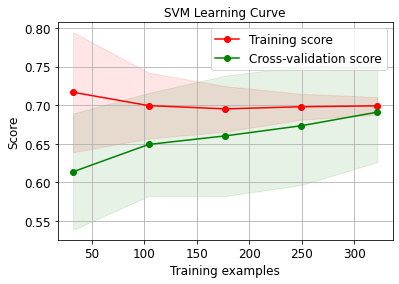

In [64]:
skplt.estimators.plot_learning_curve(grid_result.best_estimator_, data[columns], data.WON,
                                     cv=cv, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="SVM Learning Curve");
plt.savefig('SVM LC', dpi=300)